# Chapter 4: Simple Linear Regression

In [9]:
# import of some library

import pandas as pd
import numpy as np
import scipy.stats as stats
import scipy as sp
import seaborn as sns

# Configuração para o notebook e plotagem de imagens
from IPython.display import Latex
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
def jupyter_settings():
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
   # display(HTML('<style>.container { width:100% !important; }</style>'))
    sns.set()

jupyter_settings()

In before chapter we worked with distributions of single variables. Now we will discuss the relationship between variables.

The ideia in linear regression analysis is to create a model that describe the relationship between a dependent variable and one or more (next chapter) independent variable.

In linear regression, an important prerequisite is that the measurement scale of the dependent variable is metric and a normal distribution exist. If the dependent variable is categorical, a logistic regression is used.

## 4.1 - Simple Linear Regression using OLS

In simple linear regression, we have a dependente variable $y$ and its independent variable $x$, where their relationship can be drawn as a straight line, approximately. Mathematically, a simple linear regression model is a first degree equation and we can write as:

$$y = \beta_0 +\beta_1x +\epsilon$$

Here, $\beta_0$ is the term that intercept the $y=0$ and $\beta_1$ is the slope of the linear model. The error term is denoted as $\epsilon$.

The question is raised:

**IF we have a sample from a dataset ($x_i,y_i$) with $i=1,2,...,n$, how do we determine a line of best fit using the intercept term and the slop?**

To answer this question, our objective is to formulate the predicted line that best fit the points. So, the equation now is:

$$ \hat{y}= \hat{\beta}_0 +\hat{\beta}_1x$$

If we look at the relationship between the predicted values and the true vales. In order to find the line of best fit, we will minimize the vertical distance, which is, we will minimize the sum of squares errors, which is computed as:
$$ \sum_{i=1}^n e_i^2$$
where $e_i = y_i - \hat{y}_i$ is the difference between the real value of $y_i$ and the predicted value $\hat{y}_i$.

See the figure bellow

<div align='center'>
<img src="../imagens/errors.png" width="500"/>
</div align='left'>


The sum of the square of errors is given by:
$$ S = \sum_{i=1}^n (y_i -\hat{\beta}_0 -\hat{\beta}_1 x_1)^2$$

To minimize , we take the partial derivatives with respect to $\hat{\beta}_0$ and $\hat{\beta}_1$. Then, we have:


$$\frac{\partial S}{\partial \hat{\beta}_0} = -2\sum (y_i -\hat{\beta}_0 -\hat{\beta}_1 x_1) = 0 $$
$$\frac{\partial S}{\partial \hat{\beta}_1} = -2\sum x_i(y_i -\hat{\beta}_0 -\hat{\beta}_1 x_1) = 0 $$

Solve this two equation, we can find the solution:

$$\hat{\beta}_0 = \bar{y} - \hat{\beta}_1\bar{x}$$
$$\hat{\beta}_1 = \frac{\sum (x_i-\bar{x})(y_i-\bar{y})}{\sum (x_i-\bar{x})^2}$$

where $\bar{y} = \frac{\sum_{i=1}^ny_i}{n}$ and $\bar{x} = \frac{\sum_{i=1}^nx_i}{n}$, the mean for $y$ and $x$.

Finally, we can write the equation:

$$\hat{y}_i = \bar{y} +\hat{\beta}_1 (x_i-\bar{x})$$

We can define a function in Python

In [10]:
# Least Squares 

def least_squares(x, y):
    x_mean = x.mean()
    y_mean = y.mean()

    beta1 = ((x - x_mean) * (y - y_mean)).sum(axis=0) / ((x-x_mean)**2).sum(axis=0)

    beta0 = y_mean - beta1*x_mean

    return beta0,beta1

Let's see an example

**Example 4.1:** A psychologist is investigating the relationship between the time it takes an individual to react to a visual stimulus (Y) and some factors, such as sex (W), age (X) and visual acuity (W, measured in percentage). We want to adjust the model with:

- $y_i$: time reaction to i-th individuo,
- $x_i$: age to i-th individuo,
- $\epsilon_i$: error.

In [11]:
ex_4_1 = pd.read_csv("../data/ex_4.1.csv")

beta0, beta1 = least_squares(ex_4_1["X"], ex_4_1["Y"])

def mode_ex_4_1(beta0, beta1, x):
    y =  beta0 + x*beta1
    return float(round(y,2))

x_20 = mode_ex_4_1(beta0=beta0, beta1=beta1, x = 20 )

print(f"The values of beta0 is {beta0} and beta1 is {beta1:.2}")
print(f"The prediction for the time reaction for a person of 20 year old is {x_20}")

The values of beta0 is 80.5 and beta1 is 0.9
The prediction for the time reaction for a person of 20 year old is 98.5


Which give us the following equation

$$\hat{y} = 80.5 + 0.9x_i$$

Which this model we can a prediction for the time reaction for a person of 20 years old, which is:

$$\hat{y} = 80.5 + 0.9*20 = 98.5$$

We can plot the data and see how the predicted model works

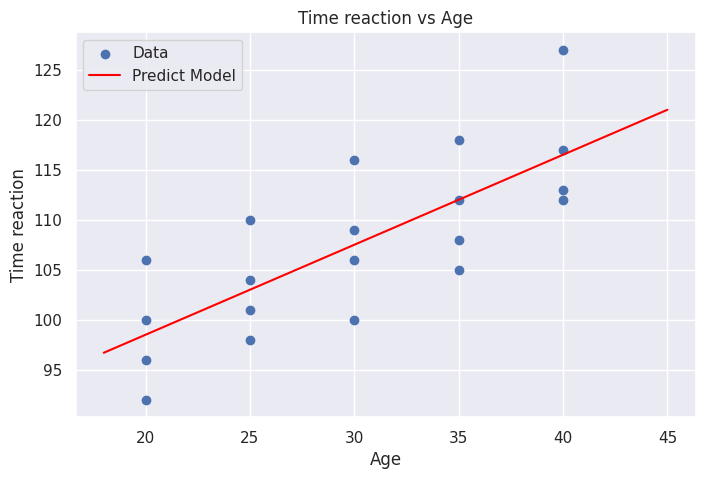

In [12]:
fig = plt.figure(figsize=(8, 5))

x = np.linspace(18,45,100)

plt.scatter(ex_4_1["X"], ex_4_1["Y"], label="Data")
plt.plot(x,beta0 + x*beta1, color="red", label="Predict Model")


plt.legend()
plt.xlabel("Age")
plt.ylabel("Time reaction")
plt.title("Time reaction vs Age")
plt.show()

In the previous graph, we can see how the predicted model works. The red line represent the prediction of the model and the blue points represent the data. We can notice that the predicted model don't pass from all points and we have one more value from the same age.

## 4.2 - Model Validation

In this section we stating how to validade the model. 

### 4.2.1 Estimator $S_e^2$

To identify if the model has a good or not validation we can use error in the prediction. In the other words, we want to minimize the error (also know as residual)or the residual variance $S^2_e$. When the residuals are small we have a good model, but how to know if the residuals are small? To answer this, we need to compare with alternative model, for example, given by $y_i - \bar{y}$, which this model is just the difference the value for $i$ and the mean. 

Other point is the difficult to compare each residual individually, so we work with the squared residuals sum, given by:

$$ SS_{Tot} = \sum^n_{i=1}(y_i-\bar{y})^2\,\,\,\text{and}\,\,\,SS_{Res} = \sum^n_{i=1}=\epsilon^2_i=\sum^n_{i=1}(y_i-\hat{y})^2$$ 

Obs.1: $SS_{Tot}$ Total **S**um of **S**quares\
Obs.2: $SS_{Res}$ Residuals **S**um of **S**quares

Taken the Example 4.1, we can calculate the residuals.

In [13]:
# Function to calculate the residuals for example 4.1
def res(x, y, beta0, beta1):
    res_list = []
    for i in range(len(x)):
        res = y[i] - (beta0 + beta1*x[i])
        res_list.append(round(res,2))
    return res_list

# Function to calculate the residuals for alternative model
def res_alt(y):
    res_alt_list = []
    med_y = y.mean()
    for i in range(len(y)):
        res = y[i]- med_y
        res_alt_list.append(res)
    return res_alt_list

In [14]:

residuals = res(ex_4_1["X"], ex_4_1["Y"], beta0, beta1)
residuals_alte = res_alt(ex_4_1["Y"])


ex_4_1_res = ex_4_1.copy()
ex_4_1_res["Residuals"] = residuals
ex_4_1_res["Residuals_alte"] = residuals_alte

In [15]:
ex_4_1_res

,Indivíduo,Y,W,X,Z,Residuals,Residuals_alte
0,1,96,H,20,90,-2.5,-11.5
1,2,92,M,20,100,-6.5,-15.5
2,3,106,H,20,80,7.5,-1.5
3,4,100,M,20,90,1.5,-7.5
4,5,98,M,25,100,-5.0,-9.5
5,6,104,H,25,90,1.0,-3.5
6,7,110,H,25,80,7.0,2.5
7,8,101,M,25,90,-2.0,-6.5
8,9,116,M,30,70,8.5,8.5
9,10,106,H,30,90,-1.5,-1.5


In [17]:
sum_res = sum_res_al =  0
for i in range(len(ex_4_1_res)):
    sum_res += ex_4_1_res['Residuals'][i]**2
    sum_res_al += ex_4_1_res['Residuals_alte'][i]**2
print(f"The Residuals sum of squares for our model is {sum_res:.2f}")
print(f"The Residuals sum of squares for our alternative model is {sum_res_al:.2f}")
print(f"The Sum of squares Reduction is {sum_res_al-sum_res:.2f}.")



The Residuals sum of squares for our model is 563.00
The Residuals sum of squares for our alternative model is 1373.00
The Sum of squares Reduction is 810.00.


Where the Sum of Squared reduction is:

$$SS_{Red} = SS_{Tot} - SS_{Res}.$$

To calculate the residual variance with $I$ levels or subpopulations, we can use the follow equation:

$$ S^2_e = \frac{SS_{Res}}{n-I} = \frac{SS_{Res}}{n-p}$$

Or $p$, which represent the number of parameters in the model. In the other words, we lose one degree of freedom for each parameters present in the model. 

For our case, we have two parameters, $y$ and $x$, so $p=2$. 

Back to our example, we have:

In [18]:
# The variation
def var_std(sum_residual, n, p):
    var = float(sum_residual/(n-p))
    std = float(np.sqrt(var))
    return var, std

var_res, std_res = var_std(sum_res, n = ex_4_1.shape[0], p=2)
var_res_alt, std_res_alt = var_std(sum_res_al, n = ex_4_1.shape[0], p=2)

print(f"The variance for the alternative mod is {var_res_alt:.2f} and the standard deviation is {std_res_alt:.2f}.")
print(f"The variance for or model is {var_res:.2f} and the standard deviation is {std_res:.2f}.")


The variance for the alternative mod is 76.28 and the standard deviation is 8.73.
The variance for or model is 31.28 and the standard deviation is 5.59.


Comparing the two models, if the linear model we have decrease the Residual Sum os Squares to 1008.62 unites.\
We can notice this too in the descreve of the value of variance and in the standard deviation.

### 4.2.3 Sum of Squared Decomposition

We see that reduction in the residual sum of squared is given by the difference between the sum of total residual from alternative model and the sum of total residual from our model as:

$$SS_{red} = SS_{Tot} - SS_{Res}$$

and write
$$SS_{Tot} = SS_{red} + SS_{Res}.$$


And the flow relation

$$y_i - \bar{y} =(y_i - \hat{y}_i) + (\hat{y}_i- \bar{y})$$

squaring this relation and taken the sum, we have 

$$\sum_{i=1}^n (y_i - \bar{y})^2 =\sum_{i=1}^n(y_i - \hat{y}_i)^2 + \sum_{i=1}^n(\hat{y}_i- \bar{y})^2$$

We can identify the equation in the follow terms

$$SS_{Tot} = \sum_{i=1}^n(y_i - \hat{y}_i)^2 + SS_{Res}$$

And we can deduce that: $SR_{Red} = \sum_{i=1}^n(y_i - \hat{y}_i)^2$, and we can write again using the relation $\hat{y}_i = \bar{y} +\hat{\beta}_1 (x_i-\bar{x})$.

Finally, we have the expression for the Reduction of Sum of Residual given by:

$$SS_{Red} = \hat{\beta}_1\sum_{i=1}^2(x_i-\bar{x})$$

Some important observation. The more is the value of $\beta_1$, more is the reduction. 

### 4.2.4 Coefficient of Determination

We can make the validation of the model by the Coefficient of Determination, because it measures the proportion of the variability of the dependent variable that is explained by the regression model. And we can write the in the follow equation:

$$ R^2 = \frac{SS_{Red}}{SS_{Tot}} = 1 - \frac{SS_{Res}}{SS_{Tot}}$$

For example 4.1, we have:

In [19]:
Det_coef = 1 - sum_res/ sum_res_al

print(f"The model can decrease the residual variance in {Det_coef*100:.2f}.")

The model can decrease the residual variance in 58.99.


We can construct a table to summarizing the all information:

|Variation Font | Degree of Freedom | $SS$       | $S^2$                                   | $F$                                 |
|---------------|-------------------|----------|-----------------------------------------|-------------------------------------|
|Regression     | 1                 |$SS_{Red}$|$SS_{Red}$                               |  $\frac{SS_{Red}}{S^2_\epsilon}$    |
|Residual       | n-2               |$SS_{Res}$|$\frac{SS_{Res}}{n-2}=S_{\epsilon}^2$    |                                     |
|Total          | n-1               |$SS_{Tot}$|$\frac{SS_{Tot}}{n-1} = S^2$               |                                     |


The F-Statistic is used to test the follow hypothesis:
- Null Hypothesis ($H_0$): The all coefficient from the variable are equal to zero
- Alternative Hypothesis ($H_a$): Al least one of the coefficient of the independent variables is nonzero.

And the interpretation is:
- Value of F:
    - For a high value of F, this indicated that the variability explained from is significant more than the variability explained from the residual. This indicated that the model is good.
    - For a lower value of F, we have the opposite.
- p-value:
    - If the p-value is less than a significance level (usually 0.05), we reject the null hypothesis and conclude that the model is significant.



In [20]:
tab_summ = pd.DataFrame({'Variation_Font':['Regression', 'Residual', 'Total'],
                        'Degree_Freedom': [1, 18, 19],
                        'SS':[round(sum_res_al-sum_res,2),round(sum_res,2), round(sum_res_al,2)],
                        'S2':[round(sum_res_al-sum_res,2), round(sum_res/(18),2),round(sum_res_al/(19),2)],
                        'F':[round((sum_res_al-sum_res)/(sum_res/(18)),2),' ',' ']})

tab_summ

,Variation_Font,Degree_Freedom,SS,S2,F
0,Regression,1,810.0,810.00,25.9
1,Residual,18,563.0,31.28,
2,Total,19,1373.0,72.26,


To verify if the new model are good or not, the strategy is to compare the residual from the new model between the old model. 
If the reduction are small, then the both models are very equivalent, and the $\beta = 0$. 

In next section we will discus the null hypothesis $H_0: \beta = 0$, but for this we will need to putting some probability in the error.

## 4.3 Residual Analysis

Again, to analyze the model we need to investigating the supposition make in the develop of the model. For this, we will use the observed data and the predict value, in the other words, we will make a residual analysis. 

The $i-th$ residual is given by: $\hat{\epsilon} = y_i - \hat{y}_i$.

First we need to padronize by:
$$\hat{z}_i = \frac{\hat{\epsilon}}{S_\epsilon}$$

And we can plot ($x_i,\hat{z}_i$).

The other patronization is the student residual, given by:

$$ \hat{r}_i = \frac{\hat{\epsilon}_i}{S_\epsilon \sqrt{1-v_{ii}}}$$

where $v_{ii} = \frac{1}{n} + \frac{(x_i- \bar{x})^2}{\sum(x_i- \bar{x})^2}$

Let's go do it for our example 4.1

In [21]:
# The z_i 
ex_4_1_res['z_i'] = round(ex_4_1_res['Residuals']/std_res,2)



# The r_i
mean_x = ex_4_1_res['X'].mean()
sum = 0
v_ii = []
r_i = []
for n in range(ex_4_1_res.shape[0]):
    sum += (ex_4_1_res['X'][n]-mean_x)**2


for n in range(ex_4_1_res.shape[0]):
    eq1 = 1/(ex_4_1_res.shape[0]) + (ex_4_1_res['X'][n]-mean_x)**2/sum
    v_ii.append(eq1)
    eq2 = ex_4_1_res['z_i'][n]/ np.sqrt(1-v_ii[n])
    r_i.append(float(round(eq2,2)))

ex_4_1_res['r_i'] = r_i


In [22]:
ex_4_1_res

,Indivíduo,Y,W,X,Z,Residuals,Residuals_alte,z_i,r_i
0,1,96,H,20,90,-2.5,-11.5,-0.45,-0.49
1,2,92,M,20,100,-6.5,-15.5,-1.16,-1.26
2,3,106,H,20,80,7.5,-1.5,1.34,1.45
3,4,100,M,20,90,1.5,-7.5,0.27,0.29
4,5,98,M,25,100,-5.0,-9.5,-0.89,-0.93
5,6,104,H,25,90,1.0,-3.5,0.18,0.19
6,7,110,H,25,80,7.0,2.5,1.25,1.30
7,8,101,M,25,90,-2.0,-6.5,-0.36,-0.37
8,9,116,M,30,70,8.5,8.5,1.52,1.56
9,10,106,H,30,90,-1.5,-1.5,-0.27,-0.28


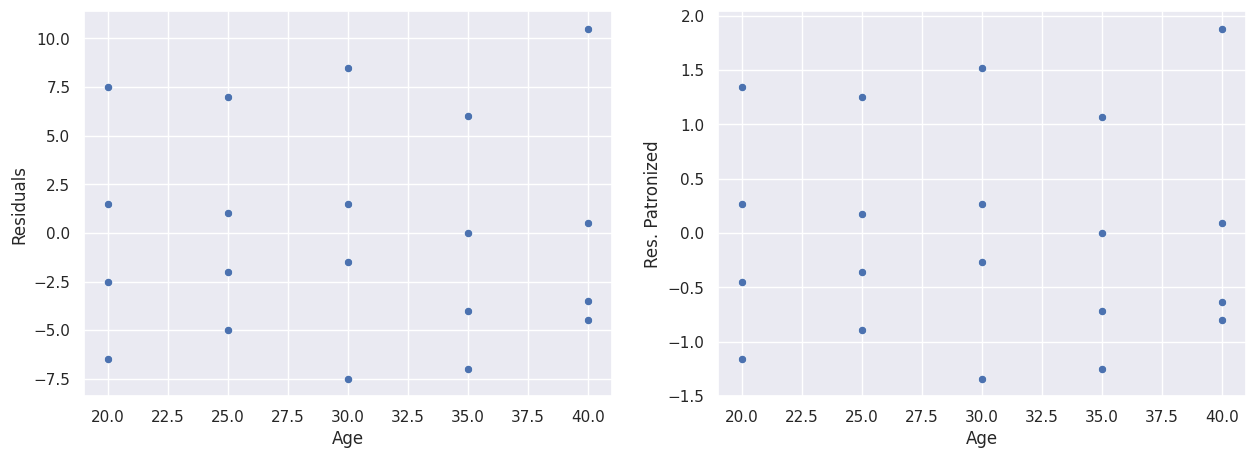

In [23]:
fig, axes = plt.subplots(1,2, figsize=(15,5))

sns.scatterplot(x='X',y='Residuals',data=ex_4_1_res,ax=axes[0])
axes[0].set_ylabel('Residuals')
axes[0].set_xlabel("Age")


sns.scatterplot(x='X',y='z_i',data=ex_4_1_res, ax=axes[1])
axes[1].set_ylabel('Res. Patronized')
axes[1].set_xlabel("Age")

plt.show()

We get the graph that show us the residuals, but how to identify possibles inadequacies? The residuals need to be normally distributed.\
If the residuals show a systematic change in variance or there is an extreme outlier the homoscedasticity of the residuals could be violated.

In the graphs before we can't se some 
- Systematic change in variance
- Presence of outlier. 

In [24]:
# Mean of Residuals
ex_4_1_res['Residuals'].mean()

np.float64(0.0)

We can see that the mean of Residual is zero and we can't some outliers, for this two assumptions, the residuals can't violated.

However, we have seen how to identify whether a distribution is normal, for this, we can look in the Histogram and the Q-Q plot.

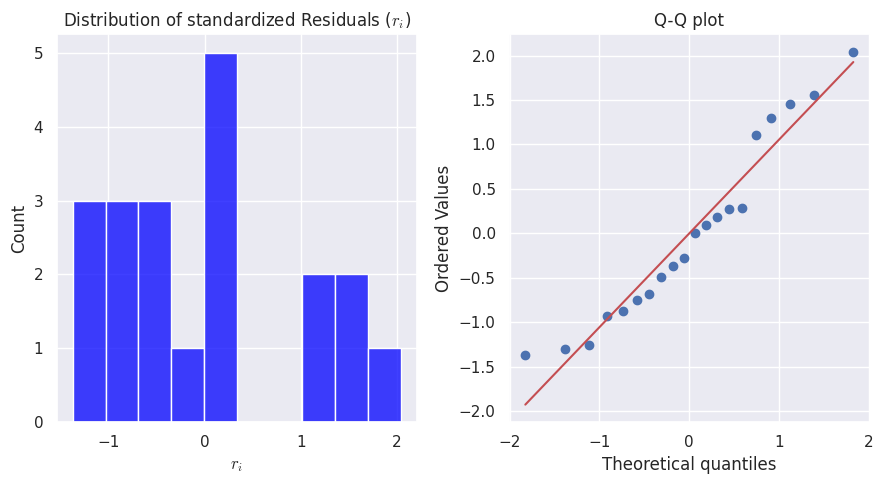

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(9,5))

sns.histplot(ex_4_1_res['r_i'], bins=10, ax=axes[0], color="blue" )
axes[0].set_xlabel("$r_i$")
axes[0].set_title("Distribution of standardized Residuals ($r_i$)")

stats.probplot(ex_4_1_res['r_i'], dist='norm', plot=axes[1] )
axes[1].set_title("Q-Q plot")

plt.tight_layout()
plt.show()

From the Histogram and the Q-Q plot, we can see that the residuals data are not normalized.

## 4.4 OLS with Statsmodels

In the before section we study how to constructed a linear model step by step, but now we want to use the library `statsmodels` to minimize the process.

In [ ]:
df = ex_4_1.copy()
# Add the constant
X = sm.add_constant(df['X'])

# Adjust the model
model = sm.OLS(df['Y'], X).fit()

# We can use fitted values to get the predicted values
fit_values = model.fittedvalues

# And resid to get the residuals

resid = model.resid # the residuals are note student normalized


In [27]:
print(model.summary()) # Summarization 

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     25.90
Date:                Wed, 19 Mar 2025   Prob (F-statistic):           7.66e-05
Time:                        16:38:12   Log-Likelihood:                -61.754
No. Observations:                  20   AIC:                             127.5
Df Residuals:                      18   BIC:                             129.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         80.5000      5.451     14.768      0.0

With the library Statsmodels is more easy to implement the model. With the method `sumarry()` we get a summarization of the model with different information. Some information is the number of observations, Degree of freedom for Residuals.\
We have too, the value of R-squared, the F-statistic and the p-value for F.

In the middle, we have the information about the coefficients:
- Coef:
    - $\beta_0=80.5$
    - $\beta_1= 0.9$
- std err: The standard error for the coefficients
- t: Is the t statistic coeff / std_err
- p>|t| is the p-value associated to the t-statistic
- [0.025   0.975]: Is the confidence interval  of 95%. Obs.: 0.025 to 0.975, the difference represent 95%, it's because the confidence interval is a bilateral,

The summary show other information that we can look in the documentation to understand better.


### 4.4.1 Diagnostic plots for analyzing model erros

In the lest sections we talking about errors, also called the residual term. In this section we will continue analysis this residuals, but using the `statsmodels`.

For common visualizations for inspecting the fit of a lest squares regression model are as follows:

- **Residual versus fitted plots**, used to inspect the requirement of a linear relationship between the input and target variables.
- **Quantile plots**, used to inspect the assumptions of residuals being normally distributed.
- **Scale-location plots**, used to inspect the assumptions of homoscedasticity, or homogenous distributions of variance.
- **Residual versus leverage influence plots**, which help to identify the impact of outliers may have on model fit.

/home/mhpedro/miniconda3/envs/projetos_github/lib/python3.13/site-packages/statsmodels/graphics/gofplots.py:1041: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


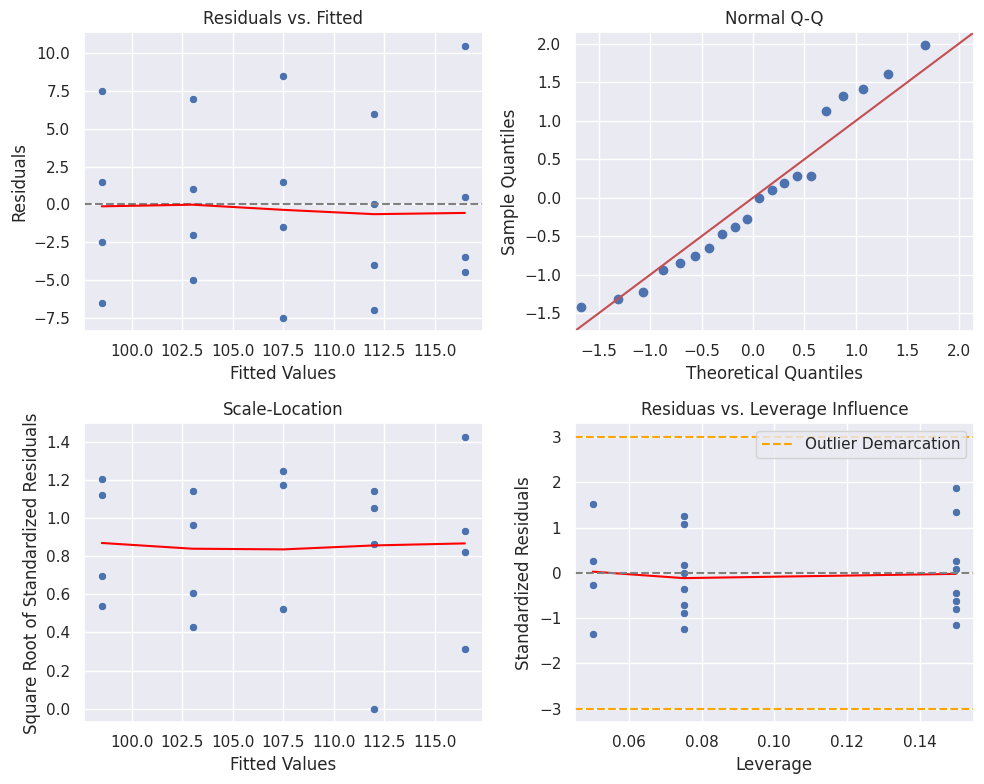

In [ ]:
from statsmodels.nonparametric.smoothers_lowess import lowess


model_residuals = model.resid
fitted_values = model.fittedvalues
standardized_residuals = model.resid_pearson # Residuals normalized to have unit variance
sqrt_standardized_residuals = np.sqrt(np.abs(model.get_influence().resid_studentized_internal))
influence = model.get_influence()
leverage = influence.hat_matrix_diag
cooks_distance = model.get_influence().cooks_distance[0]


fig, ax = plt.subplots(2, 2, figsize=(10,8))
# Residuals vs. Fitted

ax[0,0].set_xlabel("Fitted Values")
ax[0,0].set_ylabel("Residuals")
ax[0,0].set_title("Residuals vs. Fitted")

locally_wweighted_line1 = lowess(model_residuals, fitted_values)
sns.scatterplot(x=fitted_values, y=model_residuals, ax=ax[0,0])
ax[0,0].axhline(y=0, color='grey', linestyle ='--')
ax[0,0].plot(locally_wweighted_line1[:,0], locally_wweighted_line1[:,1], color= 'red')

# Normal Q-Q
ax[0,1].set_title("Normal Q-Q")
sm.qqplot(model_residuals, fit=True, line='45', ax=ax[0,1], c='blue')

# Scale-Location
ax[1,0].set_xlabel("Fitted Values")
ax[1,0].set_ylabel("Square Root of Standardized Residuals")
ax[1,0].set_title("Scale-Location")
locally_wweighted_line2 = lowess(sqrt_standardized_residuals, fitted_values)

sns.scatterplot(x=fitted_values, y=sqrt_standardized_residuals, ax=ax[1,0])
ax[1,0].plot(locally_wweighted_line2[:,0], locally_wweighted_line2[:,1], color='red')

#  Residual vs. Leverage Influence

ax[1,1].set_xlabel("Leverage")
ax[1,1].set_ylabel("Standardized Residuals")
ax[1,1].set_title("Residuas vs. Leverage Influence")
locally_wweighted_line3 = lowess(standardized_residuals, leverage)

sns.scatterplot(x=leverage, y=standardized_residuals, ax=ax[1,1])
ax[1,1].plot(locally_wweighted_line3[:,0], locally_wweighted_line3[:,1], color='red')
ax[1,1].axhline(y=0, color='grey', linestyle='--')
ax[1,1].axhline(3, color='orange', linestyle='--', label='Outlier Demarcation')
ax[1,1].axhline(-3, color='orange', linestyle='--')
ax[1,1].legend()

leverages = []
for i in range(len(cooks_distance)):
    if cooks_distance[i] > 0.5:
        leverages.append(leverage[i])
        ax[1,1].annotate(str(i) + "Cook's D > 0.5", xy=(leverage[i], standardized_residuals[i]))

if leverages:
    ax[1,1].axvline(min(leverages), color='red', linestyle='--', label= "Cook's Distance")

for i in range(len(standardized_residuals)):
    if standardized_residuals[i] > 3 or standardized_residuals[i] <-3:
        ax[1,1].annotate(i, xy=(leverage[i], standardized_residuals[i]))
plt.tight_layout()

plt.show()

Diagnostic Plots for Linear Regression
1. **Residual vs. Fitted Plot**

- Purpose: To check for patterns in residuals that indicate issues like non-linearity or heteroscedasticity.

- Interpretation:

    - Randomly scattered residuals around zero suggest a well-fitted model.

    - Clear patterns (e.g., curves or trends) indicate potential non-linearity.

    - Spread or clustering of residuals may suggest heteroscedasticity (non-constant variance).

2. **QQ Plot of Residuals**
- Purpose: To assess whether residuals follow a normal distribution.

- Interpretation:

    - Points close to the 45-degree reference line indicate normally distributed residuals.

    - Deviations, especially in the tails, suggest non-normality, which may affect statistical tests.

3. **Scale-Location Plot**
- Purpose: To check for homoscedasticity (constant variance of residuals).

- Interpretation:

 - Randomly spread standardized residuals suggest constant variance.

 - Increasing or decreasing patterns indicate heteroscedasticity, which may require data or model transformations.

4. **Residual vs. Leverage Plot**
- Purpose: To identify influential observations or outliers that may affect the model.

- Interpretation:

    - Observations with high leverage (far from the mean of independent variables) and large residuals are potentially influential.
    - Residuals should be between -2 and 2 to not be considered potential outliers. Values +/-2.5 to 3 suggest data points are extreme outliers.

    - The outlier demarcation curve (or Cook's distance curve) helps identify observations with significant impact on the model.

    - Points outside the curve may be outliers or influential observations worth investigating.

Summary

- Residual vs. Fitted: Checks model adequacy and detects non-linearity or heteroscedasticity.

- QQ Plot: Assesses normality of residuals.

- Scale-Location: Verifies homoscedasticity (constant variance).

- Residual vs. Leverage: Identifies influential observations or outliers.

These plots are essential tools for diagnosing issues in regression models and ensuring that model assumptions are met.

## 4.5 Complete example

In the example we will taken the data from the statsmodel library. Where we can build a model that test the relationship between real gross private domestic investment, `realinv`, and real private disposable income, `realdpi`.

In [29]:
df = sm.datasets.macrodata.load().data
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [30]:
df = sm.add_constant(df, prepend=False)
df_mod = df[['realinv', 'realdpi', 'const']]
df_mod

,realinv,realdpi,const
0,286.898,1886.9,1.0
1,310.859,1919.7,1.0
2,289.226,1916.4,1.0
3,299.356,1931.3,1.0
4,331.722,1955.5,1.0
...,...,...,...
198,1990.693,9838.3,1.0
199,1857.661,9920.4,1.0
200,1558.494,9926.4,1.0
201,1456.678,10077.5,1.0


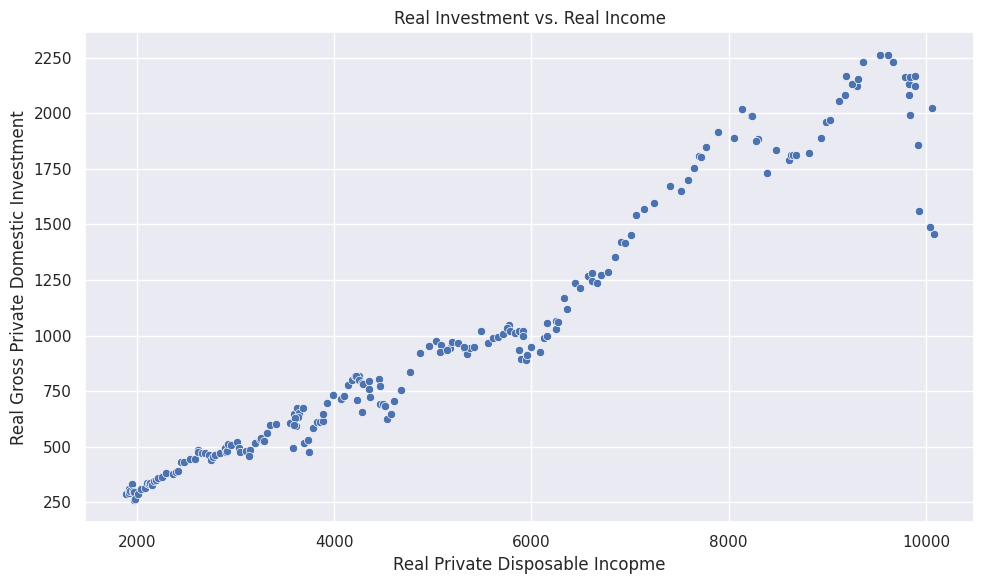

In [31]:
fig = plt.figure(figsize=(10,6))

sns.scatterplot(x='realdpi', y='realinv', data=df_mod)
plt.xlabel("Real Private Disposable Incopme")
plt.ylabel("Real Gross Private Domestic Investment")
plt.title("Real Investment vs. Real Income")

plt.tight_layout()
plt.show()

When visualizing the relationship between `realinv` and `realdpi`, we can see a strong linear relationship, but also a potential serial correlation in the data as there appears to be a somewhat **cyclical oscillation** in the data, which becomes stronger toward the extreme values, seen in the upper right of the plot.

In [32]:
#Fit the input variable and coefficient to the model
ols_model = sm.OLS(df_mod['realdpi'], df_mod[['const', 'realinv']])
compiled_mod = ols_model.fit()

In [33]:
# print the summary

print(compiled_mod.summary())

                            OLS Regression Results                            
Dep. Variable:                realdpi   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     3384.
Date:                Wed, 19 Mar 2025   Prob (F-statistic):          1.01e-127
Time:                        16:38:20   Log-Likelihood:                -1577.1
No. Observations:                 203   AIC:                             3158.
Df Residuals:                     201   BIC:                             3165.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1234.5164     80.866     15.266      0.0

We can see that the **95% confidence interval** for neither the intercept, `const`, nor the input variable, `realinv`, contains zero. Therefore, in addition to the **significance p-value** for these variables is very close to zero, which indicates that we have enough evidences to reject the null hypothesis( the coef for const and realinv is zero) and assume the alternative hypothesis, which this values are different from zero. We can see the **R-squared** statistic is 0.944 that indicates with 94.4% of points in the `realdpi` can be explained with the `realinv`.

In [37]:
len(model_residuals)

203

/home/mhpedro/miniconda3/envs/projetos_github/lib/python3.13/site-packages/statsmodels/graphics/gofplots.py:1041: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


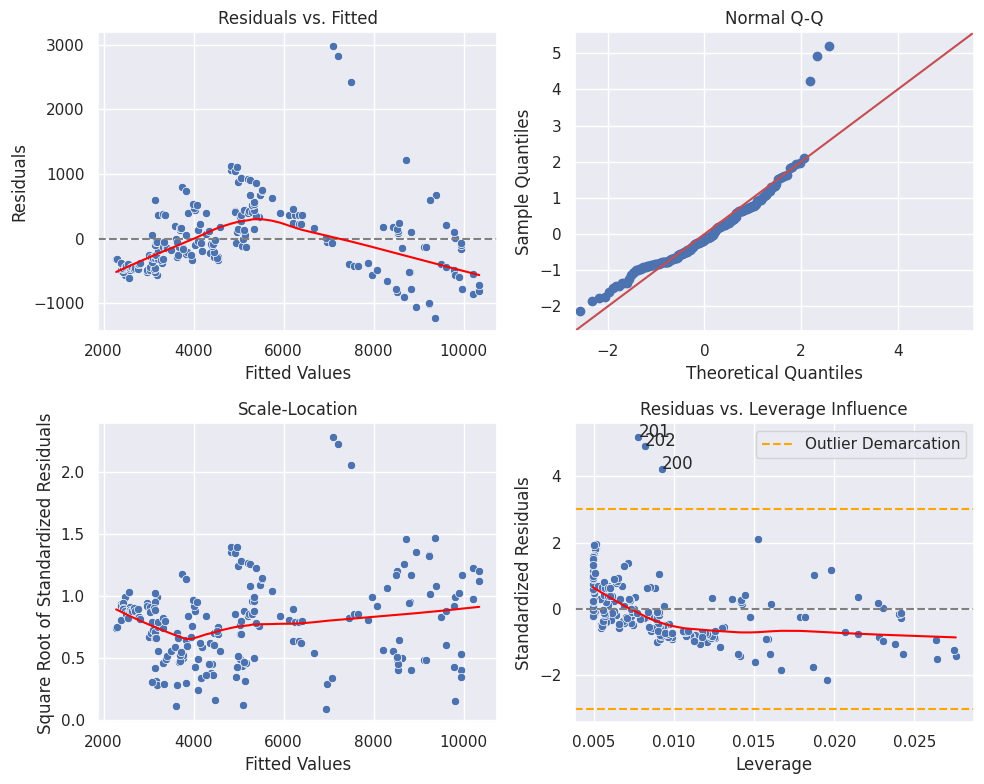

In [39]:
from statsmodels.nonparametric.smoothers_lowess import lowess


model_residuals = compiled_mod.resid
fitted_values = compiled_mod.fittedvalues
standardized_residuals = compiled_mod.resid_pearson # Residuals normalized to have unit variance
sqrt_standardized_residuals = np.sqrt(np.abs(compiled_mod.get_influence().resid_studentized_internal))
influence = compiled_mod.get_influence()
leverage = influence.hat_matrix_diag
cooks_distance = compiled_mod.get_influence().cooks_distance[0]


fig, ax = plt.subplots(2, 2, figsize=(10,8))
# Residuals vs. Fitted

ax[0,0].set_xlabel("Fitted Values")
ax[0,0].set_ylabel("Residuals")
ax[0,0].set_title("Residuals vs. Fitted")

locally_wweighted_line1 = lowess(model_residuals, fitted_values)
sns.scatterplot(x=fitted_values, y=model_residuals, ax=ax[0,0])
ax[0,0].axhline(y=0, color='grey', linestyle ='--')
ax[0,0].plot(locally_wweighted_line1[:,0], locally_wweighted_line1[:,1], color= 'red')

# Normal Q-Q
ax[0,1].set_title("Normal Q-Q")
sm.qqplot(model_residuals, fit=True, line='45', ax=ax[0,1], c='blue')

# Scale-Location
ax[1,0].set_xlabel("Fitted Values")
ax[1,0].set_ylabel("Square Root of Standardized Residuals")
ax[1,0].set_title("Scale-Location")
locally_wweighted_line2 = lowess(sqrt_standardized_residuals, fitted_values)

sns.scatterplot(x=fitted_values, y=sqrt_standardized_residuals, ax=ax[1,0])
ax[1,0].plot(locally_wweighted_line2[:,0], locally_wweighted_line2[:,1], color='red')

#  Residual vs. Leverage Influence

ax[1,1].set_xlabel("Leverage")
ax[1,1].set_ylabel("Standardized Residuals")
ax[1,1].set_title("Residuas vs. Leverage Influence")
locally_wweighted_line3 = lowess(standardized_residuals, leverage)

sns.scatterplot(x=leverage, y=standardized_residuals, ax=ax[1,1])
ax[1,1].plot(locally_wweighted_line3[:,0], locally_wweighted_line3[:,1], color='red')
ax[1,1].axhline(y=0, color='grey', linestyle='--')
ax[1,1].axhline(3, color='orange', linestyle='--', label='Outlier Demarcation')
ax[1,1].axhline(-3, color='orange', linestyle='--')
ax[1,1].legend()

leverages = []
for i in range(len(cooks_distance)):
    if cooks_distance[i] > 0.5:
        leverages.append(leverage[i])
        ax[1,1].annotate(str(i) + "Cook's D > 0.5", xy=(leverage[i], standardized_residuals[i]))

if leverages:
    ax[1,1].axvline(min(leverages), color='red', linestyle='--', label= "Cook's Distance")

for i in range(len(standardized_residuals)):
    if standardized_residuals[i] > 3 or standardized_residuals[i] <-3:
        ax[1,1].annotate(i, xy=(leverage[i], standardized_residuals[i]))
plt.tight_layout()

plt.show()

**Model validation**

In [41]:
from sklearn.model_selection import train_test_split

# Separated the data in train and test
train, test = train_test_split(df_mod, train_size=0.75, shuffle=True)

In [42]:
# Now we building the model using the training data

ols_model_train = sm.OLS(train['realdpi'], train[['const', 'realinv']])
compiled_mod_train = ols_model_train.fit()
print(compiled_mod_train.summary())

                            OLS Regression Results                            
Dep. Variable:                realdpi   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     2864.
Date:                Wed, 19 Mar 2025   Prob (F-statistic):           1.26e-99
Time:                        16:49:35   Log-Likelihood:                -1174.8
No. Observations:                 152   AIC:                             2354.
Df Residuals:                     150   BIC:                             2360.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1227.6033     88.127     13.930      0.0

The idea here is that the two models should produce similar results on two different partitions of the data.

Another method for validating the model is to compare a metric against a naive model. Let's use the **mean absolute erro (MAE)**. With this model metric, we could compare a naive linear model's errors where the error is each data point minus the average to the model's prediction. 

In [ ]:
# The MAE from the trained model

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(train['realdpi'], compiled_mod_train.predict(train[['const', 'realinv']]))

print(f"The value of MAE from the trained model is {mae:.2f}")

The value of MAE is 403.25


In [47]:
# The MAE from the Naive model


errors = []

for i in range(len(train)):
    errors.append(abs(train['realdpi'].iloc[i] - train['realdpi'].mean()))

print(f"The value of MAE from the naive model is {np.mean(errors):.2f}")

The value of MAE from the naive model is 2101.34


We can see that the trained model is more good to the naive model. 

Another method that is popular to use is testing on a holdout dataset. For this, a model is constructed and trained on the training data. Then, using that model, we apply it to the test data. We would then compare the metric to that of the training data.  Using the training model's MAE of 438, we compare it to the following:

In [52]:
mae_test = mean_absolute_error(test['realdpi'], compiled_mod_train.predict(test[['const', 'realinv']]))
print(f"The Mae value with model training with train data and test in the data test, the value is {mae_test:.2f}")

The Mae value with model training with train data and test in the data test, the value is 461.90


The error is high for the test data than for the train data. Let's see the naive.

In [53]:
# The MAE from the Naive model


errors = []

for i in range(len(test)):
    errors.append(abs(test['realdpi'].iloc[i] - test['realdpi'].mean()))

print(f"The value of MAE from the naive model is {np.mean(errors):.2f}")

The value of MAE from the naive model is 1894.35


Here we can see the model does provide better MAE than the naive model at approximately the same rate on the test data as on the train data. Therefore, we expect that the linear regression model is better than the naive model.